In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Example DataFrame for multivariable linear regression
data = {
    'Size': [1500, 1800, 2400, 3000, 3500, 4000],
    'Rooms': [3, 3, 4, 4, 5, 5],
    'Age': [10, 15, 20, 5, 8, 12],
    'Price': [400000, 450000, 600000, 650000, 700000, 750000]
}

df = pd.DataFrame(data)
print("DataFrame:\n", df)
print("df.info()", df.info())
print("df.describe()", df.describe())


DataFrame:
    Size  Rooms  Age   Price
0  1500      3   10  400000
1  1800      3   15  450000
2  2400      4   20  600000
3  3000      4    5  650000
4  3500      5    8  700000
5  4000      5   12  750000


In [22]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_samples = 200

size = np.random.randint(800, 4000, n_samples)        # House sizes between 800 and 4000 sqft
rooms = np.random.randint(2, 7, n_samples)             # Number of rooms between 2 and 6
age = np.random.randint(0, 30, n_samples)              # Age between 0 and 30 years

# Generate price based on a formula + some noise
price = (size * 150) + (rooms * 10000) - (age * 3000) + np.random.normal(0, 20000, n_samples)

# Create DataFrame
data = {
    'Size': size,
    'Rooms': rooms,
    'Age': age,
    'Price': price.astype(int)  # Cast prices to integers
}

df = pd.DataFrame(data)

# Features and Target
X = df.drop(columns=["Price"])
y = df['Price']

# Display first 10 rows
print(df.head(10))


   Size  Rooms  Age   Price
0  3974      4    7  565968
1  1660      4   20  227469
2  2094      2   27  241306
3  1930      6   11  310533
4  1895      2   11  263024
5  3892      4    4  631480
6  2438      3    6  379771
7  2969      5    3  491702
8  1266      4    5  188053
9  2038      2   12  222418


In [24]:
X = df.drop(["Price"], axis=1)  # Independent variables
y = df['Price']  # Dependent variable (target)
print(X)
print(y)


     Size  Rooms  Age
0    3974      4    7
1    1660      4   20
2    2094      2   27
3    1930      6   11
4    1895      2   11
..    ...    ...  ...
195  2106      3    8
196  3480      4   29
197  3475      5   16
198  1772      6   16
199  2568      2   29

[200 rows x 3 columns]
0      565968
1      227469
2      241306
3      310533
4      263024
        ...  
195    314079
196    469037
197    566706
198    309056
199    329312
Name: Price, Length: 200, dtype: int64


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)

X_train:
      Size  Rooms  Age
79   3249      6   11
197  3475      5   16
38    989      2   20
24   3124      3   16
122  3078      6    0
..    ...    ...  ...
106  3368      2   12
14   3719      5   22
92   3567      5   25
179  2397      6   15
102  3912      4   25

[160 rows x 3 columns]
X_test:
      Size  Rooms  Age
95   1876      2    4
15    930      5    7
30   3704      4   25
158  1663      3    3
128  2663      6   11
115  3440      4   26
69   3053      4   13
170  1859      3   24
174  3957      6    8
45   3679      5   29
66   3356      2   21
182  1595      5   16
165  3332      2   23
78   1502      5    4
186  2781      3   29
177  3529      2   16
56   1041      4    4
152  1192      4   25
82    961      2   25
68    834      3   28
124  2888      5   28
16   2485      3   19
148  3614      5    7
93   1137      5    9
65   2278      2    4
60   3745      2    2
84   2781      4   20
67   1575      3   24
125  3899      2   18
132  3919      2    7
9    2038  

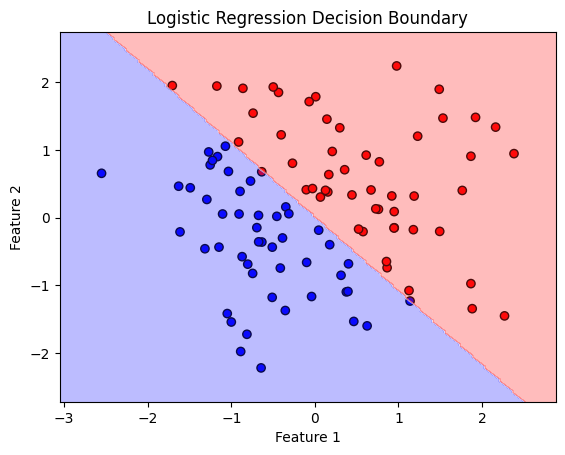

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generate random data
np.random.seed(0)
X = np.random.randn(100, 2)

# Define labels (class 0 or 1) based on a simple rule
y = (X[:, 0] + X[:, 1] > 0).astype(int)

# Train Logistic Regression
model = LogisticRegression()
model.fit(X, y)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

# Create grid to plot decision boundary
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict class probabilities for each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Draw decision boundary and regions
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.title("Logistic Regression Decision Boundary")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [27]:
y_pred = model.predict(X_test)
print("Predictions:\n", y_pred)

Predictions:
 [286841.04276654 165929.56123103 521567.59822321 268009.64442011
 426706.70412497 478614.98563819 458920.21185581 234863.63130125
 631551.84907263 516237.79680519 460017.64341387 239669.59611872
 450402.46371211 261486.18866262 359470.17539974 501160.30524349
 181285.94830588 141328.3239845   85523.91751424  67745.62423404
 399495.96897547 344576.51256962 572204.32717716 191280.6523689
 347691.43617576 575732.2817718  396809.68498689 191874.79615643
 551184.56584828 587114.71077054 287433.56152066 461962.17744312
 450795.4587698  492574.96584537 234520.90749973 379258.96893019
 399334.29287226 466553.00993509 318135.5809065  230503.66996527]


In [28]:
# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 379221947.74655575
R-squared: 0.9817566129553077


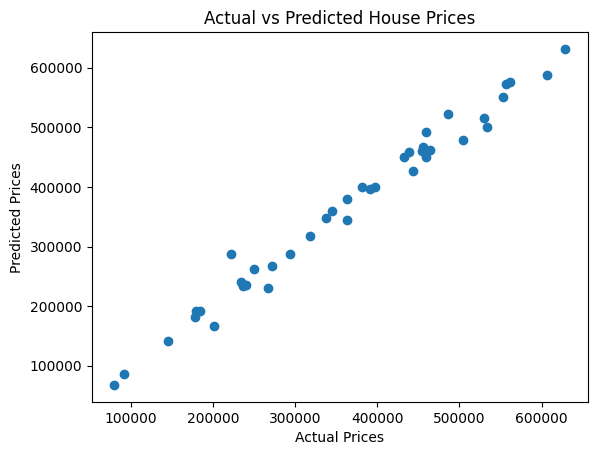

In [29]:
# Plot actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


In [31]:
# Coefficients (Weights for each feature)
print("Coefficients: ", model.coef_)

# Intercept
print("Intercept: ", model.intercept_)


Coefficients:  [  151.36913783 10419.06781532 -2991.16019687]
Intercept:  -6000.954652967281
